In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/SENTIMENT_ANALYSIS_DEEP_LEARNING /IMDB_Dataset.csv')


In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

**CHECKING THE CLASS DISTRUBUTION THTA BOTH CLASSES ARE EQUAL OR NOT **

---

**AND IF THE DATA SET IS IMBALANCED SO WE DO

✅ 1. Resampling Methods

🔹 a) Undersampling
Reduce samples from the majority class

Risk: You may lose important data

🔹 b) Oversampling

Duplicate samples from the minority class

Risk: Overfitting due to repeated data

✅ 2. SMOTE (Advanced Oversampling)

Synthetic Minority Over-sampling Technique

Generates new synthetic samples for minority class

✅ 3. Class Weights in Model Training

Tell your model to pay more attention to minority class using class_weight:
**





In [6]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


**CONVERTING CATEGORICAL VALUES INTO NUMERICAL ONES **

---


---




In [7]:
df.replace({'sentiment'  : {'positive' : 1 , 'negative' : 0}} , inplace=True )

/tmp/ipython-input-7-1411000291.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sentiment'  : {'positive' : 1 , 'negative' : 0}} , inplace=True )


In [8]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


**SPLITTING OF DATA TO TRAINING AND TESTING **

---

---





In [9]:
train_data ,  test_data = train_test_split(df ,  test_size=0.2 , random_state=42)

In [10]:
print(train_data.shape)
print(test_data.shape)


(40000, 2)
(10000, 2)


**DATA PREPROCESSING **

---



In [11]:
#  Machine learning models (like LSTM, CNN, etc.) cannot understand text directly.They work with number  only — integers or vectors ,  So, we need to convert
#  text → numbers ,  ["hello", "world", "hello"] → [1, 2, 1] ,  You want to convert them into numbers so that your LSTM model can understand and process them.
#

tokenizer =  Tokenizer(num_words = 5000) #  adding vocubalary ,t will build a dictionary of the top 5000 most common words in your dataset
# Each word will be mapped to a unique integer (e.g., 'loved' → 45)

tokenizer.fit_on_texts(train_data['review']) # Goes through all the reviews in your training data Learns the vocabulary: counts how many times each word appears
# Builds this mapping:
# {'the': 1, 'movie': 2, 'was': 3, 'great': 4, 'bad': 5, ...} Now, the tokenizer can convert full sentences into lists of integers.

X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']) , maxlen=  200) #  Converts each sentence into a list of numbers using the mapping ,
# ["I loved the movie"] → [10, 45, 1, 2] Each number represents a word ,
# Your text reviews (after tokenization) become sequences like:
# Review 1 → [12, 45, 3]         (3 words)
# Review 2 → [4, 2, 78, 1, 6, 32, 99, 105]   (8 words)
# Review 3 → [15, 88, 43, 26]    (4 words)

#These are different lengths. But… Neural Networks like LSTM require input of the same size (like exactly 200 numbers for each sentence).
#So, We Use pad_sequences() It makes every sequence the same length by: Adding 0s at the start (called padding) Trimming longer sentences if needed (called truncating

X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']) , maxlen= 200)

In [12]:
print(X_train)
print(X_test)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]
[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [13]:
# REVIEW COLUMN GOES TO X_TRAIN AND X_TEST AND SENTIMENT COLUMN COMES TO Y_TRIAN AND Y_TETS

Y_train  = train_data['sentiment']
Y_test = test_data['sentiment']

In [14]:
Y_train

,sentiment
39087,0
30893,0
45278,1
16398,0
13653,0
...,...
11284,1
44732,1
38158,0
860,1


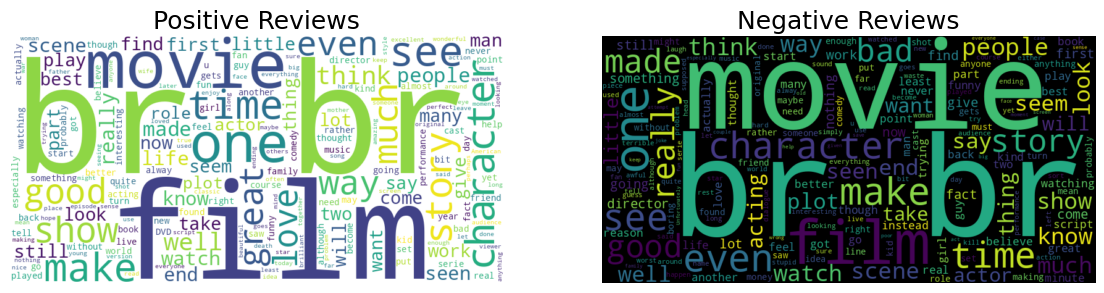

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
pos_text = ' '.join(df[df.sentiment == 1]['review'])
neg_text = ' '.join(df[df.sentiment == 0]['review'])

# Generate word clouds
pos_wc = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
neg_wc = WordCloud(width=800, height=400, background_color='black').generate(neg_text)

# Plot
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.imshow(pos_wc, interpolation='bilinear')
plt.title("Positive Reviews", fontsize=18)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(neg_wc, interpolation='bilinear')
plt.title("Negative Reviews", fontsize=18)
plt.axis('off')
plt.show()

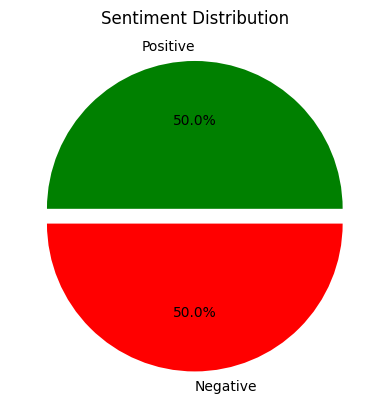

In [16]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%',
                                        labels=['Positive', 'Negative'],
                                        colors=['green', 'red'],
                                        explode=[0.05, 0.05])
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()


| Code Line                        | Layer Type       | What It Does                                               |
| -------------------------------- | ---------------- | ---------------------------------------------------------- |
| `Embedding(...)`                 | **Input Layer**  | Takes text (as numbers) and gives meaning to words         |
| `LSTM(...)`                      | **Hidden Layer** | Learns patterns, emotions, context from reviews            |
| `Dense(1, activation='sigmoid')` | **Output Layer** | Predicts if review is **positive (1)** or **negative (0)** |

In [17]:
# building the model


model  = Sequential() # this creates a Sequential model. Meaning: Layers are added one after another like a pipeline: [Input] → [Embedding] → [LSTM] → [Dense Output]
model.add(Embedding( input_dim=5000 , output_dim=128 ))  # Input Layer
model.add(LSTM(128  , dropout=0.2 , recurrent_dropout=0.2))   #  HIDEEN LAYER
model.add(Dense(1 , activation='sigmoid'))  #  output layer

# 🔧 Manually build the model by giving input shape (batch size, sequence length)
model.build(input_shape=(None, 200))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# compile the model

model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

**TRAINING THE MODEL**


In [19]:
model.fit(X_train , Y_train , epochs=7 , batch_size=64 , validation_split=0.2)  #  at the end of each epoch 20% of trainign data will left for validation

Epoch 1/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 209s 405ms/step - accuracy: 0.7374 - loss: 0.5194 - val_accuracy: 0.8496 - val_loss: 0.3636
Epoch 2/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 261s 410ms/step - accuracy: 0.8486 - loss: 0.3611 - val_accuracy: 0.8550 - val_loss: 0.3465
Epoch 3/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 262s 409ms/step - accuracy: 0.8554 - loss: 0.3479 - val_accuracy: 0.7857 - val_loss: 0.4655
Epoch 4/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 205s 409ms/step - accuracy: 0.8419 - loss: 0.3677 - val_accuracy: 0.8643 - val_loss: 0.3270
Epoch 5/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 263s 411ms/step - accuracy: 0.8926 - loss: 0.2708 - val_accuracy: 0.8712 - val_loss: 0.3389
Epoch 6/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 254s 394ms/step - accuracy: 0.9080 - loss: 0.2362 - val_accuracy: 0.8764 - val_loss: 0.3066
Epoch 7/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 201s 392ms/step - accuracy: 0.9224 - loss: 0.2009 - val_accuracy: 0.8789 - val_loss: 0.3071



**Model Evaluation**

---


Model Evaluation

In [20]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.8826 - loss: 0.2860
Test Loss: 0.2859989404678345
Test Accuracy: 0.8835999965667725


**BUILDING PREDICTIVE SYSTEM**


In [21]:
def predict_sentiment(review):
  #  takenize and pad the user review
  sequence = tokenizer.texts_to_sequences([review]) # You should pass a list of text like this , Otherwise, the tokenizer will treat each letter like a word and won't
  # find them → prediction becomes meaningless.
  padded_sequence  = pad_sequences(sequence , maxlen=200)
  # predict the model
  prediction =  model.predict(padded_sequence)
  #  makign the sentiment
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  #  eg [[0.5 , 0.3]]
  return sentiment


In [38]:
# example usage
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
The sentiment of the review is: positive


In [39]:
# example usage
new_review = "This movie was not that good"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
The sentiment of the review is: negative


In [37]:
# example usage
long_review = """
Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.
This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.
OK, first of all when you're going to make a film you must Decide if it's a thriller or a drama!
As a drama the movie is watchable. Parents are divorcing & arguing like in real life.
And then we have Jake with his closet which totally ruins all the film!
I expected to see a BOOGEYMAN similar movie, and instead I watched a drama with some meaningless thriller spots.
3 out of 10 just for the well playing parents & decent dialogs. As for the shots with Jake: just ignore them.
"""

sentiment = predict_sentiment(long_review )
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
The sentiment of the review is: negative


In [53]:
# example usage
long_review = """I  hate it... but  didn't love it either. The performances were not  decent, and the soundtrack was not  surprisingly good. Still,
 the plot was all over the place and the ending felt rushed. It's not the worst film I've seen this year, but far from the best. I'd say it's somewhere
 in the middle."""

sentiment = predict_sentiment(long_review )
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
The sentiment of the review is: negative


In [56]:
# example usage
EG_4 = 'This movie was not that good , but i love the avenger scene  , the way superman saved micheal its hilarious  , i wanna give 10 out of 5 points '

sentiment = predict_sentiment(EG_4)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
The sentiment of the review is: positive


In [57]:
# example usage
EG_4 = 'The movie had a great trailer, which made me really excited to watch it. Unfortunately, the actual film didn’t live up to the expectations. The pacing was painfully slow, and the acting felt forced in many scenes. The story had potential but was poorly executed. The only thing I genuinely liked was the cinematography — it looked beautiful. But overall, I left the theater disappointed'
sentiment = predict_sentiment(EG_4)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
The sentiment of the review is: negative


In [64]:
# Save model
model.save("sentiment_model.h5")

# Save tokenizer
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
